# John Wu
# CSE 5524
# 9/21/22
### Libraries

In [249]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.animation as animation
import matplotlib.cm as cm
import scipy
import scipy.ndimage
import skimage.io
from skimage import morphology
# plt.rcParams['figure.figsize'] = [20, 20]

### 1.) Using the images (aerobic-[001-022].bmp) provided on the class materials site, experiment with simple “motion detection” between consecutive frames using (abs) image differencing. Clean-up and remove any tiny regions (e.g., use techniques such as bwareaopen, median filtering, etc.). Experiment with different thresholds. [2 pts]

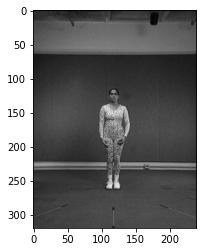

In [250]:
frameName = "aerobic-"
firstFrame = plt.imread(frameName + '001.bmp')
plt.imshow(firstFrame, cmap='gray')

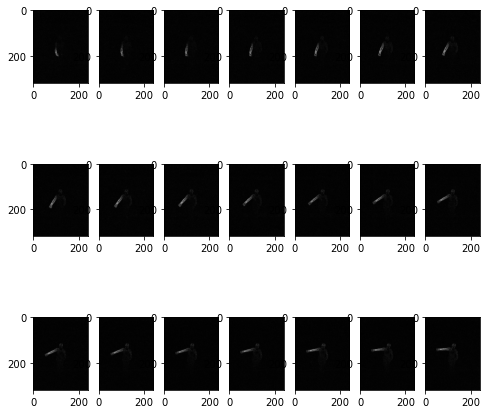

In [251]:
nFrames = 22
# read in all images and then make an animation showing what it does.
allFrames = np.ndarray((firstFrame.shape[0], firstFrame.shape[1], nFrames))
for i in range(nFrames):
    frameNumber = i + 1
    if frameNumber < 10:
        allFrames[:,:,i] = plt.imread(frameName + '00'+str(frameNumber) + '.bmp')
    else: 
        allFrames[:,:,i] = plt.imread(frameName + '0' +str(frameNumber) + '.bmp')

# 1 less frame of differencing
absDiffImgs = np.ndarray((allFrames.shape[0], allFrames.shape[1], allFrames.shape[2]-1)) 
nRows = int(nFrames / 7) # this should floor it, 22/7 ~ 3
nCols = int(nFrames / 3) # 22/3 ~ 7 floor it as well.
f, axs = plt.subplots(nRows, nCols, figsize=(8,8))
i = 1 # keep track of each frame
for row in range(nRows):
    for col in range(nCols):
        absDiffImgs[:,:,i - 1] = np.abs(allFrames[:,:,i] - allFrames[:,:,i - 1])
        axs[row, col].imshow(absDiffImgs[:,:,i - 1], cmap='gray')
        i += 1
plt.show()
f.savefig('p1_unfiltered_absdiff.png',facecolor='white')


##### We will try the python equivalent of strongly connected components (bwareopen is skimage.morphology.remove_small_objects with skimage). First we will try some absolute difference thresholding because BWAREOPEN only accepts binary images. Note, that the maximum pixel value is 135, hence we will try using thresholds T=[25,50,75]. Also, let's try different pixel P=[5,10,25] thresholds for the best T threshold. First let's start with T = 25 magnitude threshold.

In [252]:
# for sake making my life easier with plotting 
def plotAllImgs(imgs, fname = None):
    nRows = int(imgs.shape[2] / 7) # this should floor it, 22/7 ~ 3
    nCols = int(imgs.shape[2] / 3) # 22/3 ~ 7 floor it as well.
    f, axs = plt.subplots(nRows, nCols, figsize=(10,10))
    i = 0
    for row in range(nRows):
        for col in range(nCols):
            axs[row, col].imshow(imgs[:,:,i], cmap='gray')     
            i+=1   
    plt.show()
    if fname is not None:
        f.savefig(fname,facecolor='white')

In [253]:
    
print(np.min(absDiffImgs))
print(np.mean(absDiffImgs))
print(np.max(absDiffImgs))
T = [25,50,75]
allThresholdSets = []
for t in T:
    thresholdSampleImgs = np.ndarray(absDiffImgs.shape)
    for i in range(absDiffImgs.shape[2]):
        thresholdSampleImgs[:,:,i] = absDiffImgs[:,:,i] > t
    allThresholdSets.append(thresholdSampleImgs)
    
# plotAllImgs(allThresholdSets[0], 'p1_T' + str(T[0]) +'.png')

        

0.0
1.8912735615079366
135.0


##### T = 25, note still some small dots left over on bottom images. On the head region.

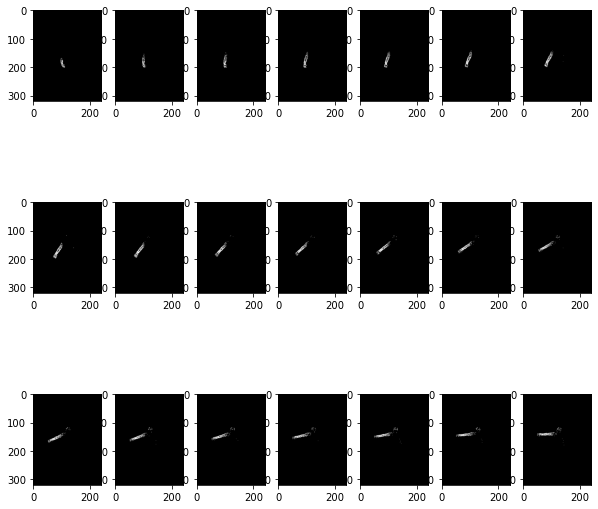

In [254]:
plotAllImgs(allThresholdSets[0], 'p1_T' + str(T[0]) +'.png')

##### T = 50, note head region is missing and we eliminated a bunch of the arm.

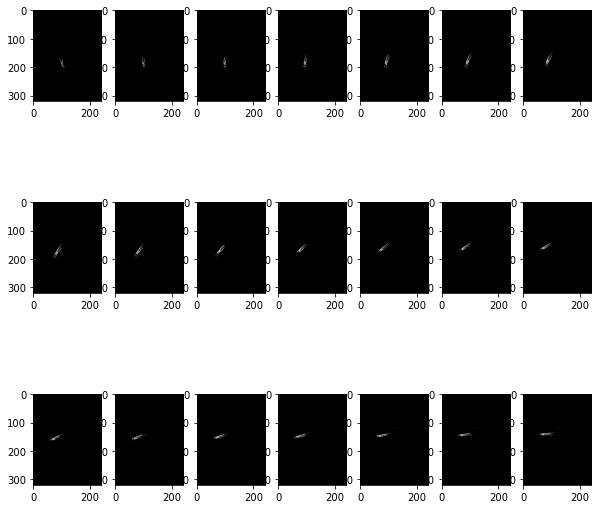

In [255]:
plotAllImgs(allThresholdSets[1], 'p1_T' + str(T[1]) +'.png')

##### T = 75, note that we went too far with thresholding, let's go back down below 50!

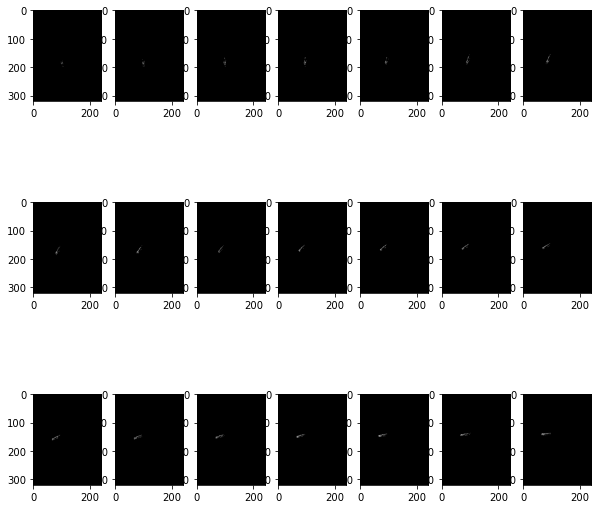

In [256]:
plotAllImgs(allThresholdSets[2], 'p1_T' + str(T[2]) +'.png')

##### Let's play around with the T values, note that we are going to try to get a happy medium between 25 and 50. Say T=25, which is good enough for selecting for a number of connected pixels and honestly to capture the movement of her head.

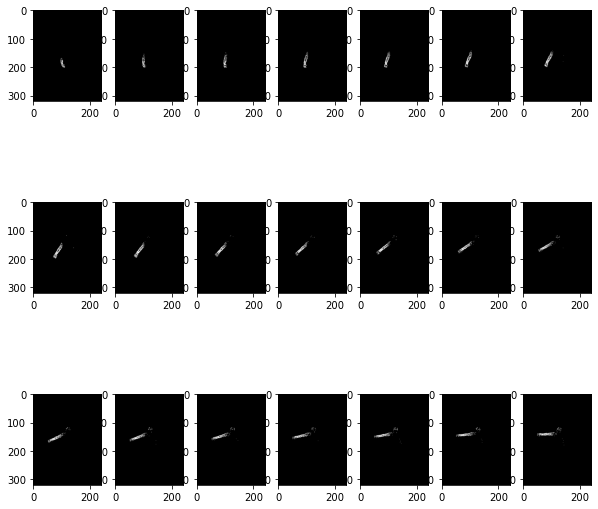

In [257]:
t = 25
thresholdImgs = np.ndarray(absDiffImgs.shape)
for i in range(absDiffImgs.shape[2]):
    thresholdImgs[:,:,i] = absDiffImgs[:,:,i] > t
plotAllImgs(thresholdImgs,'p1_T' + str(t) + '.png')

##### P = 5, does not seem to be much noise + we have a good pretty idea of head motion.

c:\ProgramData\Anaconda3\envs\PytorchBasics\lib\site-packages\skimage\_shared\utils.py:157: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  return func(*args, **kwargs)


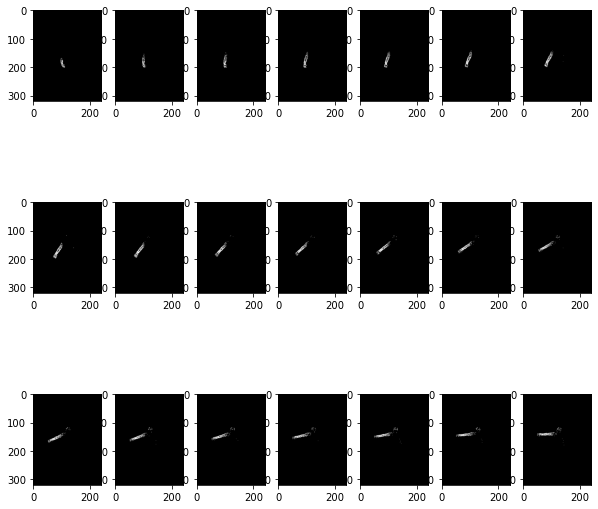

In [258]:
p = 5
fullyFilteredIms = np.ndarray(thresholdImgs.shape)
for i in range(thresholdImgs.shape[2]):
    fullyFilteredIms[:,:,i] = morphology.remove_small_objects(thresholdImgs[:,:,i].astype(int)
                                                              , min_size=p) 

plotAllImgs(fullyFilteredIms, fname='p1_T25P5.png')

##### P = 10, really no difference between this and P=5.

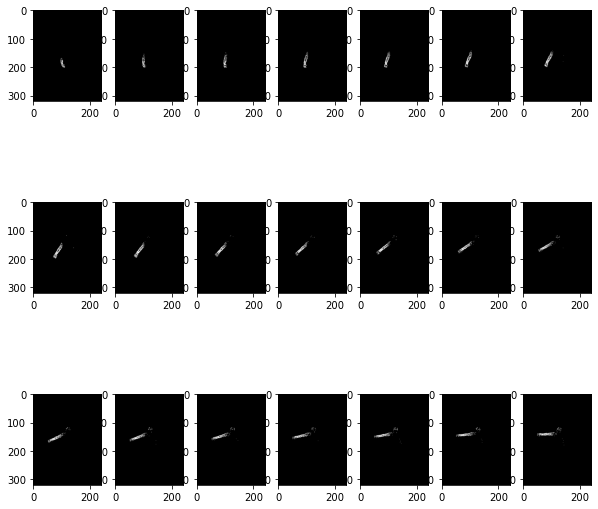

In [259]:
p = 10
fullyFilteredIms = np.ndarray(thresholdImgs.shape)
for i in range(thresholdImgs.shape[2]):
    fullyFilteredIms[:,:,i] = morphology.remove_small_objects(thresholdImgs[:,:,i].astype(int), 
                                                              min_size=p) 

# filteredFirstIm = scipy.ndimage.binary_opening(thresholdImgs[:,:,0], structure = np.ones((3,3))) note that this scikit image is too explicit and doesn't consider areas.
plotAllImgs(fullyFilteredIms, fname='p1_T25P10.png')

##### P = 25, again really not much difference, let's just use this as it still captures a bit of the head motion and more importantly the hand motion pretty well!

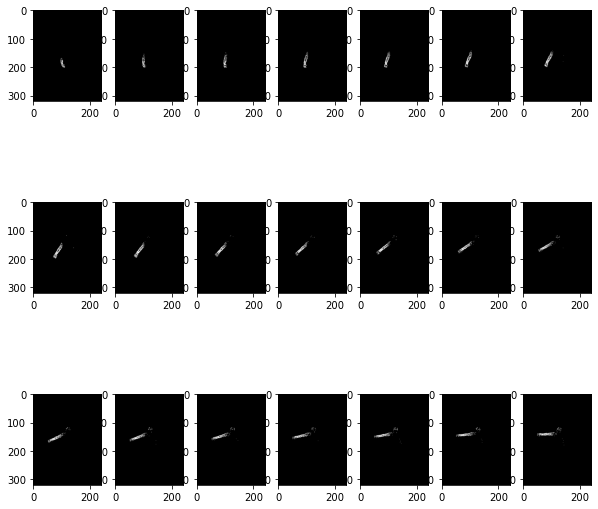

In [260]:
p = 25
fullyFilteredIms = np.ndarray(thresholdImgs.shape)
for i in range(thresholdImgs.shape[2]):
    fullyFilteredIms[:,:,i] = morphology.remove_small_objects(thresholdImgs[:,:,i].astype(int),
                                                              min_size=p) 

plotAllImgs(fullyFilteredIms, fname='p1_T25P25.png')

### 2.) Compute an MEI and MHI on the image sequence (using your best motion differencing approach from problem #1 above for each image pair i and i-1), simulating the current MHI “timestamp” for each image pair using the larger of the image pair index values (i.e., use i, not i-1). Therefore, you will have difference images from i=2 to 22. The MEI/MHI duration should include all image diff results in the sequence into the final template. Use imagesc (Matlab) to show your results. Compute the 7 similitude moments for the final MEI and the MHI. Make sure to normalize the MEI and MHI values to be between 0-1 before computing the moments using the given formula in the class notes (max[0, (i-1.0)/21.0] for this example). [4 pts]

In [261]:
# similitude moment code.
# we will define some helper functions
# centroids 
def sum_column_pixel(image): # x-bar
    rows = image.shape[0]
    cols = image.shape[1]
    mean = 0
    for r in range(rows):
        for c in range(cols): # x
            mean += c*image[r,c]
    return mean
            
def sum_row_pixels(image): # y-bar
    rows = image.shape[0]
    cols = image.shape[1]
    mean = 0
    for r in range(rows): # y
        for c in range(cols): 
            mean += r*image[r,c]
    return mean 

# central moments
def central_moment(image, colBar, rowBar, i, j):
    rows = image.shape[0]
    cols = image.shape[1]
    moment = 0
    for r in range(rows): # y
        for c in range(cols): # x (x-column is i, y-row is j)
            moment +=  np.power((c-colBar),i) * np.power((r-rowBar),j) * image[r,c]
    return moment

def denominatorTerm(sumPixels, i, j):
    return np.power(sumPixels, ((i+j) / 2.0) + 1)

# fortunately we have a specific set of similitude moments
def similitude_moments(image):
    tot = np.sum(image)
    colBar = sum_column_pixel(image) / tot
    rowBar = sum_row_pixels(image) / tot

    # hardcoded
    colMoments = np.array([0,0,1,1,2,2,3])
    rowMoments = np.array([2,3,1,2,0,1,0])
    nMoments = colMoments.shape[0]
    similitudeMoments = np.zeros(nMoments)
    for moment in range(nMoments):
        similitudeMoments[moment] = central_moment(image, colBar, rowBar,
                                    colMoments[moment], rowMoments[moment]) 
        similitudeMoments[moment] /= denominatorTerm(tot,colMoments[moment], 
                                                     rowMoments[moment])
    
    return similitudeMoments 

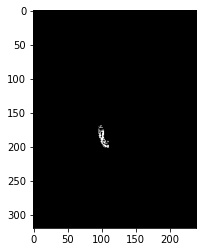

In [262]:
def normalize_mhi(mhi, deltaT, max, min):
    # first thing to note, range of frame values are between 2 and 22 to match the matlab ones, but we can do 1 to 21 if we wanted.
    for i in range(mhi.shape[2]):
        for row in range (mhi.shape[0]):
            for col in range(mhi.shape[1]):
                numerator = mhi[row,col,i] - (min - deltaT)
                denominator = max - (min - deltaT)
                if ((numerator / denominator) > 0):
                    mhi[row,col,i] = numerator / denominator
                else:
                    mhi[row,col,i] = 0
    return mhi

 # t=25 
 # p=25
def myImgDiffApproach(im1, im2,t, p):
    absDiffImgs = np.ndarray(im1.shape) 
    absDiffImgs = np.abs(im1 - im2)
    absDiffImgs = absDiffImgs > t
    absDiffImgs = morphology.remove_small_objects(absDiffImgs.astype(int), min_size=p) 
    return absDiffImgs
    

# returns a frame of all motion MEI, and a set of frames MHI, note that since we're doing pairwise frames, delta = 21
def mei_mhi(imgs, delta):
    # let's first get an image of a bunch of differences between each frame.
    mei = np.zeros(imgs[:,:,0].shape)
    mhi = np.zeros((imgs.shape[0], imgs.shape[1], imgs.shape[2] - 1))
    runningMEI = np.zeros(mei.shape)
    for i in range(1, imgs.shape[2]): # we will use tau as a frame number starting at 2 (to 22) as problem describes b.c python indexes at 0.
        tau = i + 1
        diffIm = myImgDiffApproach(imgs[:,:,i - 1], imgs[:,:,i],25,25)
        for row in range(diffIm.shape[0]):
            for col in range(diffIm.shape[1]):
                if diffIm[row,col] != 0:
                    runningMEI[row,col] = tau
                elif runningMEI[row,col] < tau - delta: # the else if (which I believe runs regardless.)
                    runningMEI[row,col] = 0
        mhi[:,:,i-1] = runningMEI
    mei = (runningMEI > 0).astype(int) 
    
    return [mei, mhi]

# quick test with img differencing.                   
t = 25
p = 25
plt.imshow(myImgDiffApproach(allFrames[:,:,0], allFrames[:,:,1], t, p), cmap='gray') # cool.
        

##### Here is the MHI.

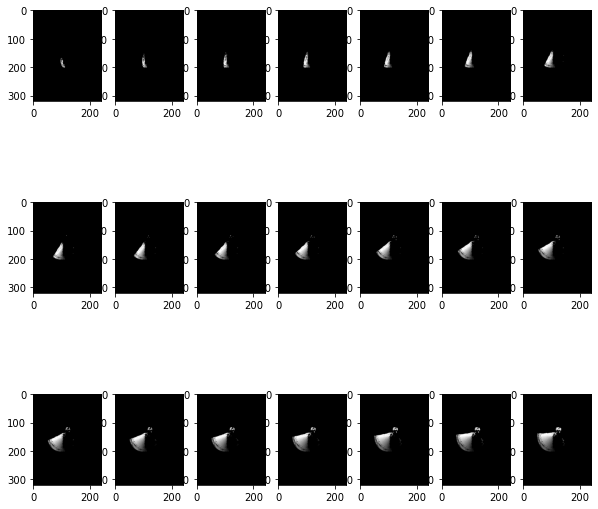

In [263]:
# use delta = nFrames to capture all the frames... Also BE CAREFUL USING SAME VARIABLE NAMES IN JUPYTER NOTEBOOKS, uh because they will literally share the same variable if you're not careful!
meiShow, mhiShow = mei_mhi(allFrames, nFrames)
plotAllImgs(mhiShow, fname='p2_mhi.png')

In [264]:
print(np.max(mhiShow))
print(np.min(mhiShow))

22.0
0.0


##### Let's real quick compare with the original last 21 images. The MHI makes sense as we can see her arm move as well as her head tilting slightly!

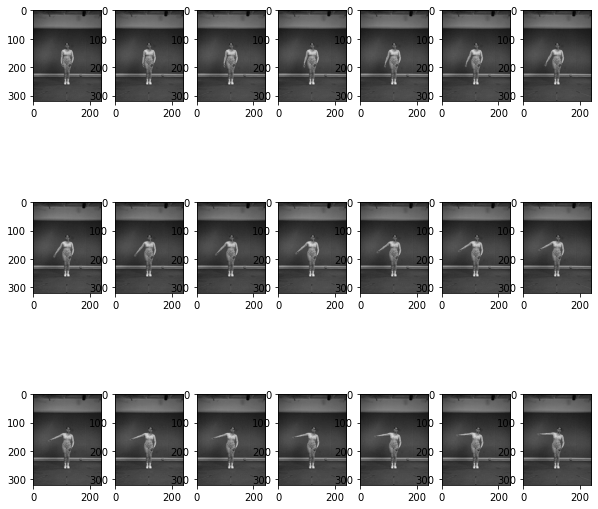

In [265]:
plotAllImgs( allFrames[:,:,1:],fname='aerobic.png')

##### Let's check the MEI. This should make sense. Grader's note! I don't know why this happens in this jupyter notebook, but if for some reason, it looks off, please restart the whole notebook! There's a weird bug I can't find.

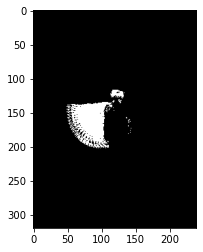

In [266]:
plt.imshow(meiShow, cmap='gray')
plt.imsave('p2_mei.png',meiShow, cmap='gray')

##### Now, we will compute some similitude moments. First we will normalize using the equation above, in this case, our minimum tau value is 2, and max frame number is 22. Since we go frame by frame, our delta T = 1. 

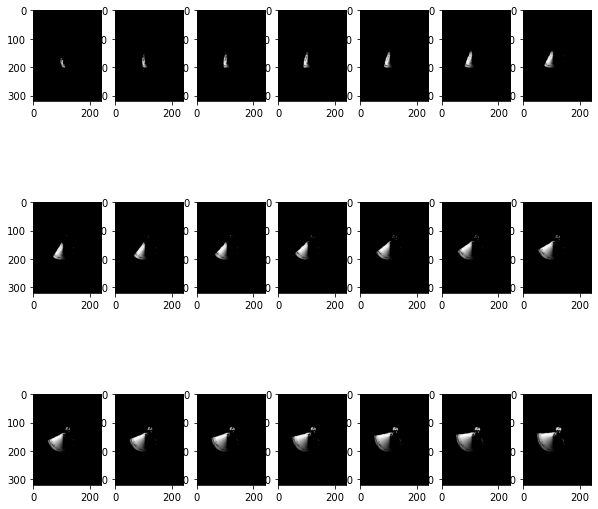

In [267]:
delT = 1
maxFrameNum = 22
minFrameNum = 2
normalizedMHI = normalize_mhi(mhiShow,delT, maxFrameNum, minFrameNum)
plotAllImgs(normalizedMHI, fname='p2_normalized_mhi.png')

##### Quickly confirm that MHIs and MEIs are in between 0 and 1.

In [268]:
print('mhi max:', np.max(normalizedMHI))
print('mhi min:', np.min(normalizedMHI))
print('mei max:', np.max(meiShow))
print('mei min:', np.min(meiShow))

mhi max: 1.0
mhi min: 0.0
mei max: 1
mei min: 0


##### Now, let us compute some similitude moments for both the MEI and the last frame (which captures all the information of the 22 frames) of the MHI.

In [269]:
print(similitude_moments(meiShow))
print(similitude_moments(normalizedMHI[:,:, normalizedMHI.shape[2] - 1]))

[ 0.13748198 -0.00061182 -0.02173997  0.02536828  0.10735694 -0.02401064
  0.01355709]
[ 0.17859305  0.02657094 -0.07193782  0.03979959  0.21244759 -0.05410196
  0.06102241]


#### Quick Discussion and Moment Results:
| image | n02        | n03        | n11         | n12        | n20        | n21        | n30        |
|-------|------------|------------|-------------|------------|------------|------------|------------|
| MEI   | 1.58024301 | -0.1175033 | 0.05884027  | 0.67299189 | 0.43228    | 0.04972336 | 0.4103674  |
| MHI   | 0.47637737 | 0.25209505 | -0.04266923 | 0.2810499  | 0.27791056 | 0.00073121 | 0.20071823 |


##### So, interestingly enough, the similitude moments for the MHI are not the same as the MEI moments. This should make sense, because the MEI does not care about the temporal intensities that the MHI does. For instance, the MHI has darker shades in the bottom left (where the hands have already passed through) whereas the MEI is full white in those regions. However, also observe, the magnitudes aren't completely different between the MEI and MHI signifying some form of similarity in shape.




### 3.) Create a 101x101 image with a black (0) background and a white (255) box of size 21x21, placing the upper-left corner at pixel (row=40, col=6). Create another new box image, but shift the box 1-pixel to the right and 1-pixel down. Compute the normal flow between the images. Use 3x3 Sobel Fx, Fy gradient masks (with the proper normalization values – see notes) and a 3x3 average mask on each image when computing Ft. Use MATLAB’s quiver function to draw the motion vectors on the image (call imagesc, then ‘hold on’, and lastly call quiver). (Make sure your gradient mask orientations/directions [and the plot axes] are consistent and point in the proper directions!!!) Is the result what you expected? Why or why not? Comment on the flow for the 4 sides of the box and also for the 4 corners. [5 pts]

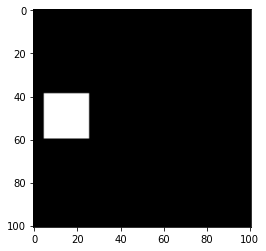

In [270]:
boxRows = 21
boxCols = 21
bgRows = 101
bgCols = 101
# note that the problem above uses matlab indexing, so we must subtract 1 to get equivalent python indexing.
firstBoxIm = np.zeros((bgRows, bgCols))
initialRowPos = 39 # 40 -1
initialColPos = 5 # 6 -1
for row in range(initialRowPos, initialRowPos + boxRows):
    for col in range(initialColPos, initialColPos + boxCols):
        firstBoxIm[row,col] = 255
plt.imshow(firstBoxIm, cmap='gray')

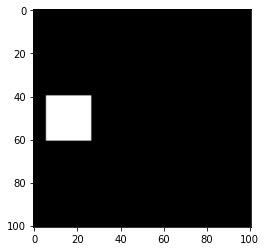

In [271]:
secondBoxIm = np.zeros((bgRows, bgCols))
nextRowPos = initialRowPos + 1 # 1 pixel down in the image is literally increasing row by 1
nextColPos = initialColPos + 1 # 1 pixel to the right, is adding col by 1
for row in range(nextRowPos, nextRowPos + boxRows):
    for col in range(nextColPos, nextColPos + boxCols):
        secondBoxIm[row,col] = 255

plt.imshow(secondBoxIm, cmap='gray')

In [272]:
# some 3x3 sobel matrices and/or filters, let's do it hardcoded
def sobelFilters():
    fX = np.zeros((3,3)) # column wise symmetricity
    fY = np.zeros((3,3)) # row wise symmetricity
    weightings = np.array([1,2,1])
    symmetric = np.array([-1,0,1])
    for row in range(fX.shape[0]):
        for col in range(fX.shape[1]):
            fX[row,col] = weightings[row] * symmetric[col]
            fY[row,col] = weightings[col] * symmetric[row]
    fX = fX / 8.0 # normalize to 1
    fY = fY / 8.0
    return fX, fY        

# I am not doing separable average masking here, because this is easier + all we're doing is smoothing.
def averageMask():
    return np.ones((3,3)) / 9
sobelX, sobelY = sobelFilters()
print(sobelX)
print(sobelY)
print(averageMask())

[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]
[[-0.125 -0.25  -0.125]
 [ 0.     0.     0.   ]
 [ 0.125  0.25   0.125]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


##### We will first smooth both box images, and then show them below!

In [273]:
# First smooth the two box images using box Imgs (idk what this actually does, but let's just do it.) before computing fx, fy 
smoothBoxIm1 = scipy.ndimage.filters.correlate(firstBoxIm, averageMask(),
                                               mode='nearest')
smoothBoxIm2 = scipy.ndimage.filters.correlate(secondBoxIm, averageMask(), 
                                               mode='nearest')

##### Box 1:

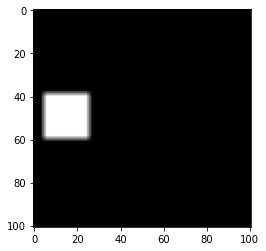

In [274]:
plt.imshow(smoothBoxIm1,cmap='gray') # box 1!

##### Box 2:

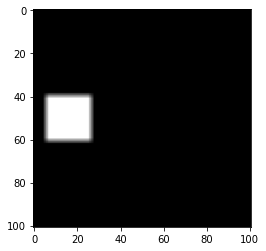

In [275]:
plt.imshow(smoothBoxIm2,cmap='gray')

#####  Now we will compute fx, fy gradients for I_t, which in this case is the second box. Then, we compute F_t = smooth(I_t) - smooth(I_t-1).

In [276]:
fx = scipy.ndimage.filters.correlate(secondBoxIm, sobelX, mode='nearest')
fy = scipy.ndimage.filters.correlate(secondBoxIm, sobelY, mode='nearest')
ft = smoothBoxIm2 - smoothBoxIm1

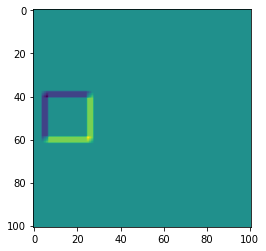

In [277]:
plt.imshow(ft)

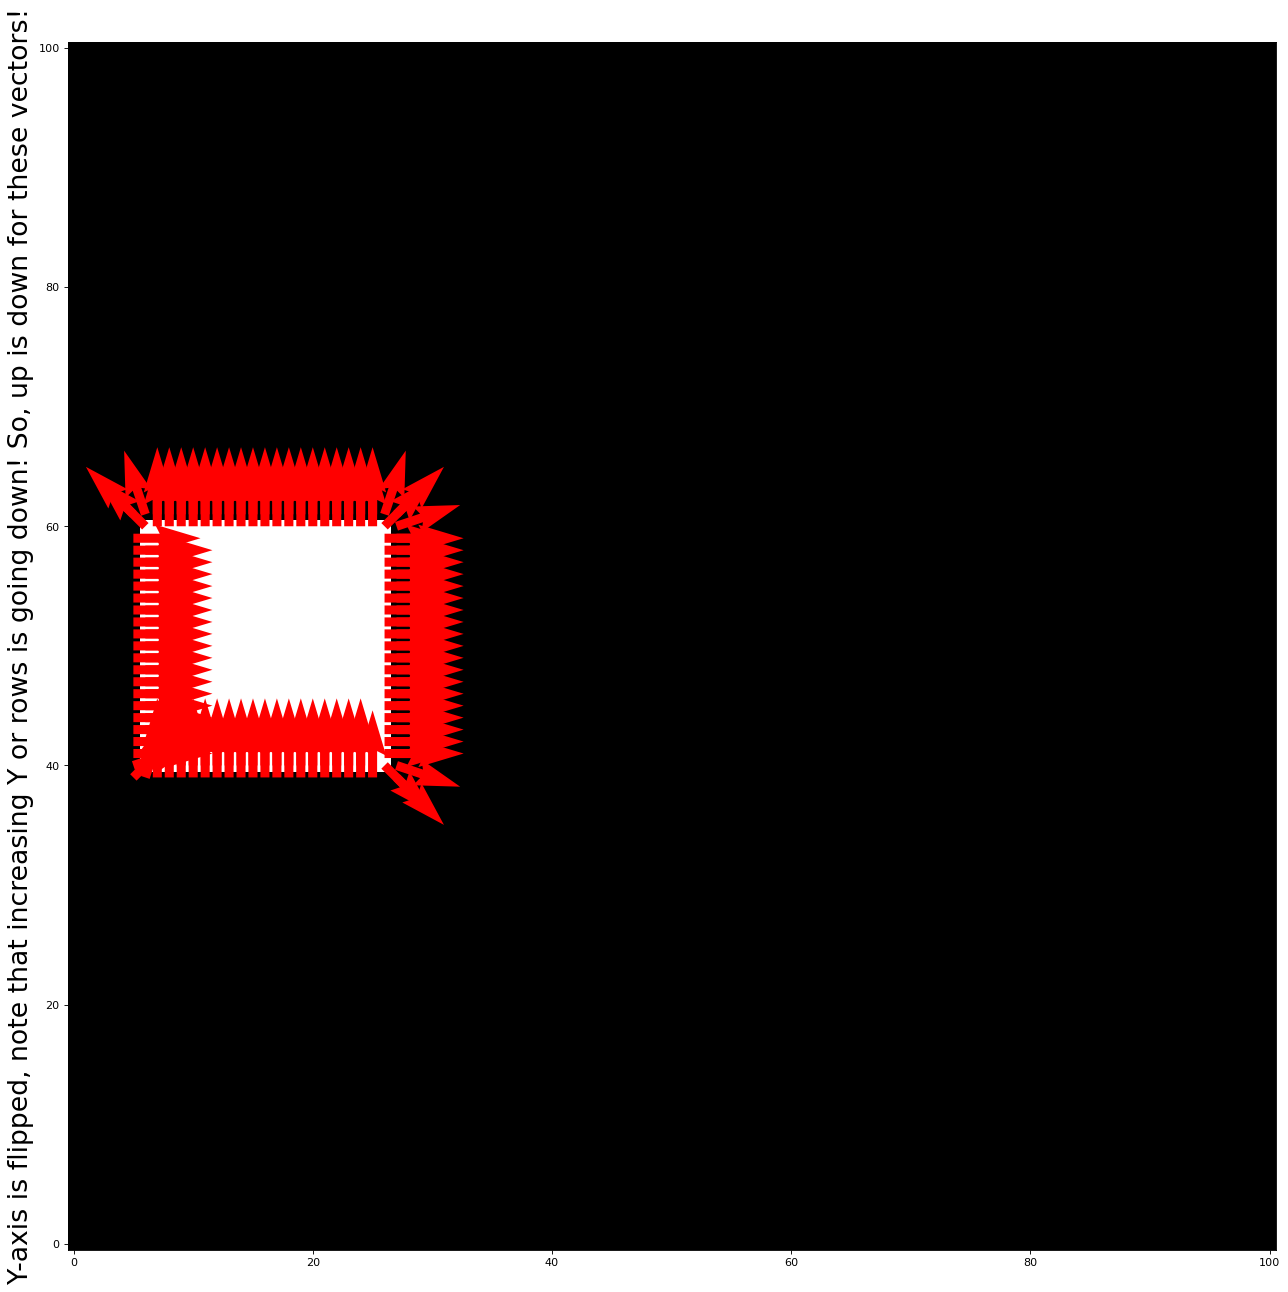

In [278]:
# compute normal optical flow for each pixel in the images above.
normalFlowDir = np.ndarray((secondBoxIm.shape[0], secondBoxIm.shape[1],2)) 
normalFlowMag = np.ndarray(secondBoxIm.shape) 
plt.figure(figsize=(20,20), dpi=80)
for row in range(secondBoxIm.shape[0]):
    for col in range(secondBoxIm.shape[1]):
        if ft[row,col] != 0: # no 0 magnitude divisions.
            if fx[row,col] != 0 or fy[row,col] !=0:
                normalFlowDir[row,col,0] = fx[row,col]  
                normalFlowDir[row,col,0] /= np.sqrt( np.square(fx[row,col]) + np.square(fy[row,col]))
                normalFlowDir[row,col,1] = fy[row,col] 
                normalFlowDir[row,col,1] /= np.sqrt( np.square(fx[row,col]) + np.square(fy[row,col]))
                normalFlowMag[row,col] = -ft[row,col] 
                normalFlowMag[row,col] /= np.sqrt( np.square(fx[row,col]) + np.square(fy[row,col]))
                vec = plt.quiver(col, row, normalFlowMag[row,col]*normalFlowDir[row,col, 0], normalFlowMag[row,col]*normalFlowDir[row,col,1], color='red')
                ax = vec.axes 
plt.imshow(secondBoxIm, cmap='gray',origin='lower')
plt.ylabel('Y-axis is flipped, note that increasing Y or rows is going down! So, up is down for these vectors!',fontsize=24)
# we will invert the y-axis because otherwise the arrows in the image point in wrong direction.
# plt.gca().invert_yaxis() 
plt.savefig('p3_nflow_og.png',facecolor='white')



##### Discussion: There are some interesting properties of this box. First, let's make sure we understand that increasing Y or rows in this case is up as we had to flip the "origin" in the image to match that of the flow vector y-directions. However, what this means is increasing Y or increasing row number is actually the "down" direction when thinking in terms of the image realm. As such, the up vectors make sense as we have increasing "Y" rows and thereby we are technically going down in the image. The left and right direction are still the same in the image space as they are in the vector space. Hence, the result makes sense for the flow vectors on the four sides of the boxes as they all point to the right and up (down in image space). However, the corners are surprising to say the least. The corner pixels for the top right and bottom left corner makes sense, but the other corners are weirdly pointing in directions not in line with the rest of the motion vectors. For instance, the bottom right is pointing downwards or the top left is pointing to the left, which is not the direction of motion. These corners are weirdly inconsistent with the sides of the box. One theory as to why this might be the case is that because we are only able to get the normal vector of dx and dy, at those very corners, since it's a box with a sharp corner, the vector considers all nearby pixels and thus points in those directions accordingly. These corner vectors may very well be the flaw with this type of motion vectors.